In [1]:
import copy
import os
import torch
from torchinfo import summary
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
import sklearn.preprocessing
#from directory_tree import display_tree
# Customed Library
import engine ,model_builder,utils
import numpy as np
#import torchinfo
from timeit import default_timer as timer 
import matplotlib.pyplot as plt
import random
import torch.nn.functional as F
#display_tree('./')

In [2]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def plot_prediction(Pred_Values,True_Values,Lim_value, nbins=15):
#def plot_loss_curves(results_bunch: dict[str, list[float]]):
    """Plots Results

    Args: True value, Prediction results 
        
    """
    xlim =Lim_value
    ylim =Lim_value
    
    
    fig,host=plt.subplots(nrows=2, ncols=3,figsize=(15,8))
    ax0 = host[0][0].twinx()
    
    host[0][0].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][0].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][0].plot(utils.extraction(True_Values,0),label='True',color='black')
    host[0][0].plot(utils.extraction(Pred_Values,0),label='Predict',color='red',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,0))),len(np.array(utils.extraction(True_Values,0))))
    
    ax0.fill_between(A0,0, np.absolute(np.array(utils.extraction(True_Values,0)) - np.array(utils.extraction(Pred_Values,0))),  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][0].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('X')
    
    
    ax0 = host[0][1].twinx()
    
    host[0][1].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][1].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][1].plot(utils.extraction(True_Values,1),label='True',color='black')
    host[0][1].plot(utils.extraction(Pred_Values,1),label='Predict',color='blue',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,0))),len(np.array(utils.extraction(True_Values,0))))
    
    ax0.fill_between(A0,0, np.absolute(np.array(utils.extraction(True_Values,1)) - np.array(utils.extraction(Pred_Values,1))),  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][1].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('Y')
    
    ax0 = host[0][2].twinx()
    
    host[0][2].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][2].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][2].plot(utils.extraction(True_Values,2),label='True',color='black')
    host[0][2].plot(utils.extraction(Pred_Values,2),label='Predict',color='orange',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,2))),len(np.array(utils.extraction(True_Values,2))))
    
    ax0.fill_between(A0,0, np.absolute(np.array(utils.extraction(True_Values,2)) - np.array(utils.extraction(Pred_Values,2))),  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][2].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('Z')
    
   

    
    #plt.tight_layout(pad=3)
    

    
    #plt.show()
    # For 


    #plt.figure(figsize=(12,3))
    
    y = utils.extraction(Pred_Values,0)
    x = utils.extraction(True_Values,0)
    host[1][0].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet, range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][0].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][0].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('X')

    
    y = utils.extraction(Pred_Values,1)
    x = utils.extraction(True_Values,1)
    host[1][1].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet, range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][1].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][1].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('Y')


    
    y = utils.extraction(Pred_Values,2)
    x = utils.extraction(True_Values,2)
    host[1][2].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet,range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][2].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][2].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('Z')

    plt.tight_layout(pad=1)

    plt.show()
def plot_loss_curves(results_bunch,single_flag=None):
#def plot_loss_curves(results_bunch: dict[str, list[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
   # Setup a plot 
    plt.figure(figsize=(10, 5))
    if single_flag==None:
        for i in range(len(results_bunch)):
            results=results_bunch[i]

            # Get the loss values of the results dictionary (training and test)
            loss = results['train_loss']
            test_loss = results['test_loss']

            # Get the accuracy values of the results dictionary (training and test)


            # Figure out how many epochs there were
            epochs = range(len(results['train_loss']))



            # Plot loss
            plt.subplot(1, 2, 1)
            plt.plot(epochs, loss, label='con '+str(i))
            if i==len(results_bunch)-1:
                plt.title('Train_Loss')
                plt.xlabel('Epochs')
                plt.legend()


            plt.subplot(1, 2, 2)
            plt.plot(epochs, test_loss, label='con '+str(i))
            if i==len(results_bunch)-1:
                plt.title('Test_Loss')
                plt.xlabel('Epochs')
                plt.legend()
                
                
    else:
        results=results_bunch
         # Get the loss values of the results dictionary (training and test)
        loss = results['train_loss']
        test_loss = results['test_loss']

        # Get the accuracy values of the results dictionary (training and test)


        # Figure out how many epochs there were
        epochs = range(len(results['train_loss']))



        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, loss, label='con ')

        plt.title('Train_Loss')
        plt.xlabel('Epochs')
        plt.legend()


        plt.subplot(1, 2, 2)
        plt.plot(epochs, test_loss, label='con ')
        
        plt.title('Test_Loss')
        plt.xlabel('Epochs')
        plt.legend()




In [3]:
from torch import nn 


    








class LSTMModel_V0(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(LSTMModel_V1, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        self.Relu=nn.leaky_relu()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.Relu(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out
class LSTMModel_V1(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(LSTMModel_V1, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        self.Relu=nn.ReLU()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.Relu(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out


class LSTMModel_V2(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(LSTMModel_V2, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        self.act_F=nn.Tanh()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.act_F(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out


class LSTMModel_V3(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(LSTMModel_V3, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        self.act_F=nn.Sigmoid()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.act_F(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

class RNNModel_V3(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(RNNModel_V3, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.RNN(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Sigmoid()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out    
    
    
    

class GRUModel_V3(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(GRUModel_V3, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Sigmoid()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out  
    
class GRUModel_V2(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(GRUModel_V2, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out
    
class GRUModel_V0(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(GRUModel_V0, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        #out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out  
'''
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.hidden_size = hidden_size
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Parameter(torch.rand(hidden_size))
        self.v.data.normal_(mean=0, std=1. / hidden_size**0.5)

    def forward(self, hidden, encoder_outputs):
        # hidden: (batch_size, hidden_size)
        # encoder_outputs: (batch_size, seq_len, hidden_size)

        seq_len = encoder_outputs.size(1)

        # Repeat the hidden state for each time step in the sequence
        hidden = hidden.unsqueeze(1).repeat(1, seq_len, 1)

        # Concatenate the hidden state and encoder outputs
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))

        # Compute attention scores
        energy = energy.permute(0, 2, 1)  # (batch_size, hidden_size, seq_len)
        v = self.v.unsqueeze(0).unsqueeze(0).repeat(hidden.size(0), 1, 1)  # (batch_size, 1, hidden_size)
        attention_scores = torch.bmm(v, energy).squeeze(1)  # (batch_size, seq_len)

        # Apply softmax to get attention weights
        attention_weights = F.softmax(attention_scores, dim=1).unsqueeze(2)

        # Calculate the weighted sum of encoder outputs
        context = torch.bmm(attention_weights.permute(0, 2, 1), encoder_outputs)

        return context, attention_weights

class LSTMWithAttention(nn.Module):
  # def __init__(self, input_size, hidden_size, output_size, num_layers=1):
    def __init__(self, input_size : int, hidden_size:int, num_layers:int, output_size:int, dropout_prob:float):
        super(LSTMWithAttention, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.attention = Attention(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x)

        # Attention mechanism
        context, attention_weights = self.attention(h_n[-1], lstm_out)

        # Concatenate the context vector with the hidden state
        lstm_out = torch.cat((context, h_n[-1]), dim=1)

        # Fully connected layer
        output = self.fc(lstm_out)

        return output ,attention_weights
'''
class AttentionLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(AttentionLSTM, self).__init__()
        self.hidden_size = hidden_size

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)

        # Attention mechanism
        self.attention = nn.Linear(hidden_size * 2, 1)

        # Fully connected layer for regression
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM layer
        lstm_out, (h_n, _) = self.lstm(x)

        # Attention mechanism
        attention_weights = F.softmax(self.attention(torch.cat([lstm_out, h_n.repeat(lstm_out.size(1), 1, 1)], dim=2)), dim=1)
        context = torch.bmm(attention_weights.permute(0, 2, 1), lstm_out).squeeze(1)

        # Fully connected layer
        output = self.fc(context)

        return output, attention_weights
    
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        
        return torch.squeeze(x,1)

In [6]:
# Feature
right_finger_condition = right_finger_sensor.append(Input_P_col)
#right_finger_condition =right_finger_condition.append(TCP_col)
left_finger_condition = left_finger_sensor.append(Input_P_col)
#left_finger_condition =left_finger_condition.append(TCP_col)
One_entire_condition=right_finger_sensor.append(left_finger_sensor)
#One_entire_condition=One_entire_condition.append(TCP_col)
One_entire_condition=One_entire_condition.append(Input_P_col)

In [5]:
Columns=['Flag',
         'Force_X','Force_Y','Force_Z','Torque_X','Torque_Y','Torque_Z',
         'Input_P_1','Input_P_2',
         'TCP_X','TCP_Y','TCP_Z',
         'Sensor_P_1_1','Sensor_P_1_2','Sensor_P_1_3','Sensor_P_1_4',
         'Sensor_P_1_5','Sensor_P_1_6','Sensor_P_1_7','Sensor_P_1_8',
         'Sensor_P_1_9','Sensor_P_1_10','Sensor_P_1_11','Sensor_P_1_12',
         'Sensor_S_1',
         'Sensor_P_2_1','Sensor_P_2_2','Sensor_P_2_3','Sensor_P_2_4',
         'Sensor_P_2_5','Sensor_P_2_6','Sensor_P_2_7','Sensor_P_2_8',
         'Sensor_P_2_9','Sensor_P_2_10','Sensor_P_2_11','Sensor_P_2_12',
         'Sensor_S_2',
         'num_finger','properties','trial'
        ]
temp = pd.read_pickle("./pickle/diff_object.pkl") 
temp1 = pd.DataFrame(temp[:].values,columns=Columns)
Total_dataset=temp1

Flag_col = pd.Index(['Flag'])
For_col = pd.Index(['Force_X','Force_Y','Force_Z'])
Input_P_col = pd.Index(['Input_P_1','Input_P_2'])
TCP_col= pd.Index(['TCP_X','TCP_Y','TCP_Z'])

right_finger_pressure1 = pd.Index([ 'Sensor_P_1_1','Sensor_P_1_2',
                                  'Sensor_P_1_3','Sensor_P_1_4',
                                  'Sensor_P_1_5','Sensor_P_1_6'])

right_finger_pressure2 = pd.Index([ 'Sensor_P_1_7','Sensor_P_1_8',
                           'Sensor_P_1_9','Sensor_P_1_10',
                           'Sensor_P_1_11','Sensor_P_1_12'])
right_finger_pressure=right_finger_pressure1.append(right_finger_pressure2)
right_finger_strain = pd.Index([ 'Sensor_S_1' ])

right_finger_sensor=right_finger_pressure.append(right_finger_strain)

left_finger_pressure1 = pd.Index([ 'Sensor_P_2_1','Sensor_P_2_2',
                         'Sensor_P_2_3','Sensor_P_2_4',
                         'Sensor_P_2_5','Sensor_P_2_6'])

left_finger_pressure2 = pd.Index([ 'Sensor_P_2_7','Sensor_P_2_8',
                           'Sensor_P_2_9','Sensor_P_2_10',
                           'Sensor_P_2_11','Sensor_P_2_12'])
left_finger_pressure=left_finger_pressure1.append(left_finger_pressure2)

left_finger_strain = pd.Index([ 'Sensor_S_2' ])

left_finger_sensor=left_finger_pressure.append(left_finger_strain)


# Robot signal Calibration
Cal_list_col=[For_col,TCP_col]

for i in range(len(Cal_list_col)):
    for j in range(len(Cal_list_col[i])):
        
        col_name=Cal_list_col[i][j]
        
        Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0]
        
# Sensor signal
Sensor_Cal_list_col=[right_finger_sensor,left_finger_sensor]

for i in range(len(Sensor_Cal_list_col)):
    for j in range(len(Sensor_Cal_list_col[i])):
        
        col_name=Sensor_Cal_list_col[i][j]
        
        Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0] +500*j




obj_sqr= pd.DataFrame(Total_dataset.query('num_finger=="sqr" ').values,columns=Columns)
obj_ccv= pd.DataFrame(Total_dataset.query('num_finger=="ccv" ').values,columns=Columns)
obj_big= pd.DataFrame(Total_dataset.query('num_finger=="big" ').values,columns=Columns)
obj_untrain=pd.read_pickle("./pickle/two_finger/two_complex.pkl") 

In [120]:
ddd=pd.concat([obj_sqr1, obj_ccv1,obj_big1], ignore_index=True)
ddd

,Flag,Force_X,Force_Y,Force_Z,Torque_X,Torque_Y,Torque_Z,Input_P_1,Input_P_2,TCP_X,...,Sensor_P_2_7,Sensor_P_2_8,Sensor_P_2_9,Sensor_P_2_10,Sensor_P_2_11,Sensor_P_2_12,Sensor_S_2,num_finger,properties,trial
0,False,0.0,0.0,0.0,-0.004395,0.000024,0.002156,0.0,0.0,0.0,...,3000.0,3500.0,4000.0,4500.0,5000.0,5500.0,6000.0,sqr,comp,2
1,False,0.0,0.0,0.0,-0.004395,0.000024,0.002156,0.0,0.0,0.0,...,3000.0,3500.0,4000.0,4500.0,5000.0,5500.0,6000.0,sqr,comp,2
2,False,0.0,0.0,0.0,-0.004395,0.000024,0.002156,0.0,0.0,0.0,...,3000.0,3500.0,4000.0,4500.0,5000.0,5500.0,6000.0,sqr,comp,2
3,False,0.00119,0.000685,-0.001677,-0.004449,-0.000024,0.002154,0.0,0.0,0.0,...,3000.0,3500.0,4000.0,4500.0,5000.0,5500.0,5995.799805,sqr,comp,2
4,False,0.00119,0.000685,-0.001677,-0.004449,-0.000024,0.002154,0.0,0.0,-0.000008,...,3000.0,3500.0,4000.0,4500.0,5000.0,5500.0,5995.799805,sqr,comp,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184619,False,0.055932,-0.1161,-0.053249,0.00558,0.003353,0.003219,0.0,0.0,0.00032,...,2991.0,3494.000061,3994.200073,4484.600037,4996.300049,5501.200012,5999.099609,big,comp,1
184620,False,0.055932,-0.1161,-0.053249,0.00558,0.003353,0.003219,0.0,0.0,0.00032,...,2991.0,3494.000061,3994.200073,4484.600037,4996.300049,5501.200012,5999.099609,big,comp,1
184621,False,0.055932,-0.1161,-0.053249,0.00558,0.003353,0.003219,0.0,0.0,0.00032,...,2991.0,3494.000061,3994.200073,4484.600037,4996.300049,5501.200012,5999.099609,big,comp,1
184622,False,0.055932,-0.1161,-0.053249,0.00558,0.003353,0.003219,0.0,0.0,0.00032,...,2991.0,3494.000061,3994.200073,4484.600037,4996.300049,5501.200012,6004.199707,big,comp,1


In [103]:
# Robot signal Calibration
Total_dataset=obj_untrain
Cal_list_col=[For_col,TCP_col]

for i in range(len(Cal_list_col)):
    for j in range(len(Cal_list_col[i])):

        col_name=Cal_list_col[i][j]

        Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0]

# Sensor signal
Sensor_Cal_list_col=[right_finger_sensor,left_finger_sensor]

for i in range(len(Sensor_Cal_list_col)):
    for j in range(len(Sensor_Cal_list_col[i])):

        col_name=Sensor_Cal_list_col[i][j]

        Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0] +500*j


In [123]:
save_mode= True

if save_mode== True:
    ddd.to_pickle("./pickle/Parameter_study/concat.pkl") 
    #TEMP_Total_dataset

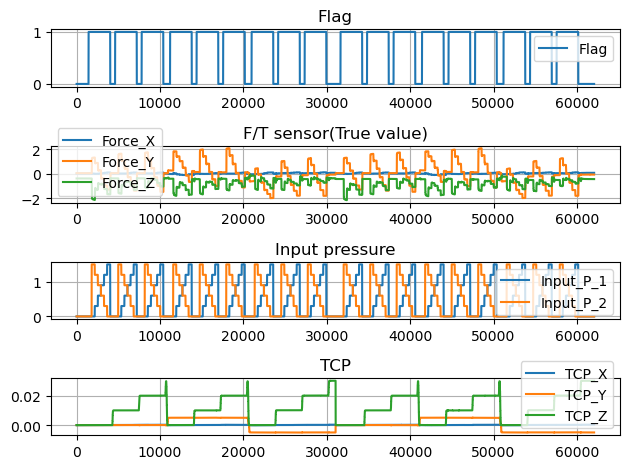

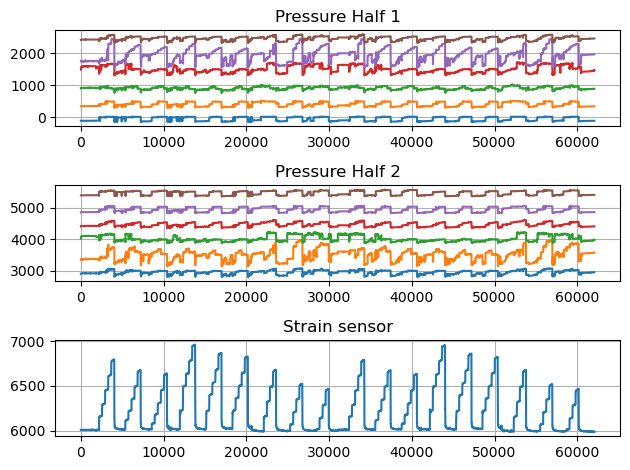

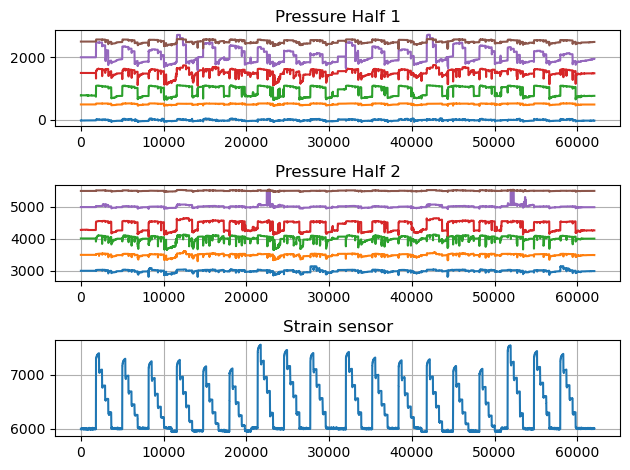

In [17]:
#P_Sensor_col=Total_dataset.columns[9:21]

TEMP_Total_dataset=obj_big
fig, axes = plt.subplots(nrows=4, ncols=1)
TEMP_Total_dataset[Flag_col].replace({True: 1, False: 0}).plot(ax=axes[0],grid=True,title='Flag')

TEMP_Total_dataset[For_col].plot(ax=axes[1],grid=True,title='F/T sensor(True value)')
TEMP_Total_dataset[Input_P_col].plot(ax=axes[2],grid=True,title='Input pressure')
TEMP_Total_dataset[TCP_col].plot(ax=axes[3],grid=True,title='TCP')
plt.tight_layout()


fig, axes = plt.subplots(nrows=3, ncols=1)
TEMP_Total_dataset[right_finger_pressure1].plot(ax=axes[0],legend=None,grid=True,title='Pressure Half 1')
TEMP_Total_dataset[right_finger_pressure2].plot(ax=axes[1],legend=None,grid=True,title='Pressure Half 2')
TEMP_Total_dataset[right_finger_strain].plot(ax=axes[2],grid=True,legend=None,title='Strain sensor')
plt.tight_layout()
fig, axes = plt.subplots(nrows=3, ncols=1)
TEMP_Total_dataset[left_finger_pressure1].plot(ax=axes[0],legend=None,grid=True,title='Pressure Half 1')
TEMP_Total_dataset[left_finger_pressure2].plot(ax=axes[1],legend=None,grid=True,title='Pressure Half 2')
TEMP_Total_dataset[left_finger_strain].plot(ax=axes[2],grid=True,legend=None,title='Strain sensor')
plt.tight_layout()

In [101]:
Total_dataset

,Flag,Force_X,Force_Y,Force_Z,Torque_X,Torque_Y,Torque_Z,Input_P_1,Input_P_2,TCP_X,...,Sensor_P_2_7,Sensor_P_2_8,Sensor_P_2_9,Sensor_P_2_10,Sensor_P_2_11,Sensor_P_2_12,Sensor_S_2,num_finger,properties,trial
0,False,0.0,0.0,0.0,-0.002483,-0.000039,0.00108,0.0,0.0,0.0,...,3000.0,3500.0,4000.0,4500.0,5000.0,5500.0,6000.0,big,comp,2
1,False,0.0,0.0,0.0,-0.002483,-0.000039,0.00108,0.0,0.0,0.0,...,3000.0,3500.0,4000.0,4500.0,5000.0,5500.0,6000.0,big,comp,2
2,False,0.000855,-0.001155,-0.002009,-0.002531,0.0,0.001036,0.0,0.0,0.0,...,3000.0,3500.0,4000.0,4500.0,5000.0,5500.0,6000.0,big,comp,2
3,False,0.000855,-0.001155,-0.002009,-0.002531,0.0,0.001036,0.0,0.0,0.0,...,3000.0,3500.0,4000.0,4500.0,5000.0,5500.0,6000.0,big,comp,2
4,False,0.000855,-0.001155,-0.002009,-0.002531,0.0,0.001036,0.0,0.0,0.000019,...,3000.0,3500.0,4000.0,4500.0,5000.0,5500.400024,5994.0,big,comp,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62058,False,0.055932,-0.1161,-0.053249,0.00558,0.003353,0.003219,0.0,0.0,0.00032,...,2991.0,3494.000061,3994.200073,4484.600037,4996.300049,5501.200012,5999.099609,big,comp,1
62059,False,0.055932,-0.1161,-0.053249,0.00558,0.003353,0.003219,0.0,0.0,0.00032,...,2991.0,3494.000061,3994.200073,4484.600037,4996.300049,5501.200012,5999.099609,big,comp,1
62060,False,0.055932,-0.1161,-0.053249,0.00558,0.003353,0.003219,0.0,0.0,0.00032,...,2991.0,3494.000061,3994.200073,4484.600037,4996.300049,5501.200012,5999.099609,big,comp,1
62061,False,0.055932,-0.1161,-0.053249,0.00558,0.003353,0.003219,0.0,0.0,0.00032,...,2991.0,3494.000061,3994.200073,4484.600037,4996.300049,5501.200012,6004.199707,big,comp,1


In [104]:
obj_untrain1=Total_dataset

In [ ]:
obj_sqr1

In [28]:
TEMP_Total_dataset['num_finger'].unique()

array(['sqr', 'ccv', 'big'], dtype=object)

In [10]:
Combi_df =pd.read_pickle("./pickle/diff_object.pkl") 
# Setup hyperparameters
LAYER_DIM=2
Sequential_L=1
NUM_EPOCHS = 20
BATCH_SIZE = 64
HIDDEN_UNITS = 5
LEARNING_RATE = 0.001
Dropout_prob=0
device = "cpu"
duration_time=[]
loss_results=[]

Y=np.array(Combi_df.filter(items=For_col))
X=np.array(Combi_df.filter(items=One_entire_condition)) ## important part


X_scaler = sklearn.preprocessing.MinMaxScaler()
Y_scaler = sklearn.preprocessing.MinMaxScaler()

X=torch.FloatTensor(X_scaler.fit_transform(X))
Y=torch.FloatTensor(Y_scaler.fit_transform(Y))



X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.3, # 20% test, 80% train
                                                    shuffle=False,
                                                    random_state=42
                                                   ) # make the random split reproducible
train_dataset=DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=BATCH_SIZE,shuffle=True)
test_dataset=DataLoader(utils.Data(X_test,Y_test,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)
Input_dim=len(X_train[0])
Output_dim=len(Y_train[0])


In [7]:
## model variable set

########## 1. LDNN ##########
M_L = SimpleNN(
    input_size = 28,
    hidden_size=5,
    output_size=3,
)

M_L.load_state_dict(torch.load("models/exp_model/F4/exp_model_17_LN_shuffle.pth"))
########## 2. LSTM ##########
M_LSTM=LSTMModel_V3(
    input_dim = 28,
    hidden_dim=5,
    layer_dim=2,
    output_dim=3,
    dropout_prob=0
)
M_LSTM.load_state_dict(torch.load("models/exp_model/F4/exp_model_17_LSTM_noshuffle.pth"))


###
M_LSTMM=LSTMModel_V3(
    input_dim = 28,
    hidden_dim=5,
    layer_dim=2,
    output_dim=3,
    dropout_prob=0
)
M_LSTMM.load_state_dict(torch.load("models/exp_model/F4/exp_model_17_LSTM_shuffle.pth"))
###
########## 3. RNN ##########

M_RNN=RNNModel_V3(
    input_dim = 28,
    hidden_dim=5,
    layer_dim=2,
    output_dim=3,
    dropout_prob=0
)
M_RNN.load_state_dict(torch.load("models/exp_model/F4/exp_model_17_RNN_noshuffle.pth"))
##
M_RNNN=RNNModel_V3(
    input_dim = 28,
    hidden_dim=5,
    layer_dim=2,
    output_dim=3,
    dropout_prob=0
)
M_RNNN.load_state_dict(torch.load("models/exp_model/F4/exp_model_17_RNN_shuffle.pth"))
##

########## 4. GNU ##########

M_GRU=GRUModel_V3(
    input_dim = 28,
    hidden_dim=5,
    layer_dim=2,
    output_dim=3,
    dropout_prob=0
)
M_GRU.load_state_dict(torch.load("models/exp_model/F4/exp_model_17_GRU_noshuffle.pth"))

########## 4. GNU + SHuffle##########
M_GRUU=GRUModel_V3(
    input_dim = 28,
    hidden_dim=5,
    layer_dim=2,
    output_dim=3,
    dropout_prob=0
)
M_GRUU.load_state_dict(torch.load("models/exp_model/F4/exp_model_17_GRU_shuffle.pth"))

MODEL=[M_L , M_LSTM, M_LSTMM, M_RNN, M_RNNN,M_GRU, M_GRUU]

In [13]:
exp10=LSTMModel_V3(
    input_dim = 28,
    hidden_dim=5,
    layer_dim=2,
    output_dim=3,
    dropout_prob=0
)
exp10.load_state_dict(torch.load("models/exp_model/exp_model_10.pth"))

<All keys matched successfully>

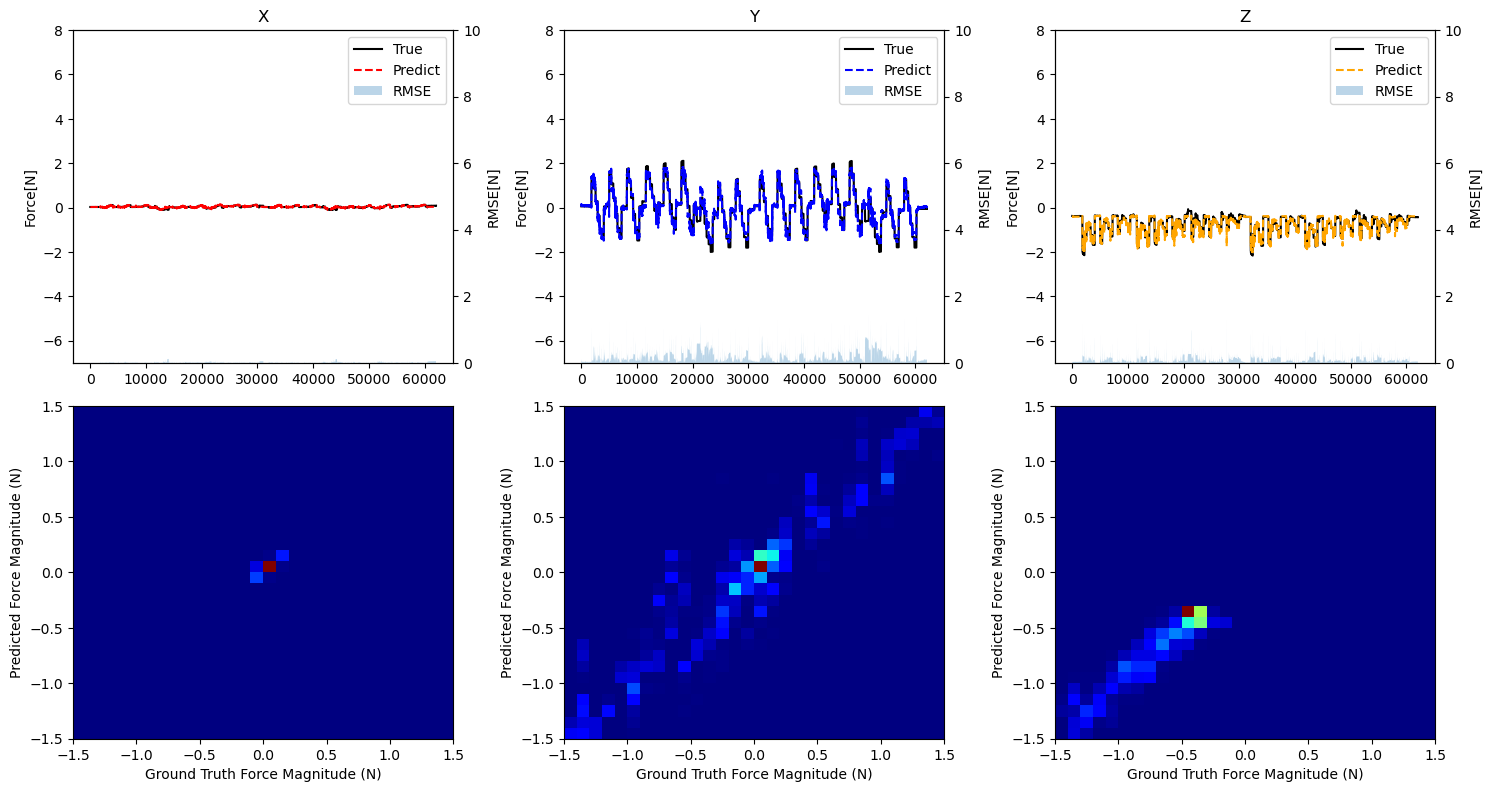

In [15]:
#data_set_list=[obj_big ,obj_ccv ,obj_sqr ,obj_untrain]
#data_set_list=[obj_big1 ,obj_ccv1 ,obj_sqr1 ,obj_untrain1]
#data_set_list=[obj_big ,obj_ccv]
data_set_list=[obj_big]
#model_name_path_list=MODEL
#model_name_path_list=[M_GRUU]
model_name_path_list=[exp10]

result_rmse=[]

for i in range(len(data_set_list)):
    result_rmse.append([])
    
    feature_set = One_entire_condition
    for j in range(len(model_name_path_list)):
        model=model_name_path_list[j]
        data_set=data_set_list[i]
        
        
        Y=np.array(data_set.filter(items=For_col))
        X=np.array(data_set.filter(items=One_entire_condition)) ## important part


        X_scaler = sklearn.preprocessing.MinMaxScaler()
        Y_scaler = sklearn.preprocessing.MinMaxScaler()

        X=torch.FloatTensor(X_scaler.fit_transform(X))
        Y=torch.FloatTensor(Y_scaler.fit_transform(Y))



        X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                            Y, 
                                                            test_size=0.3, # 20% test, 80% train
                                                            shuffle=False,
                                                            random_state=42
                                                           ) # make the random split reproducible
        train_dataset=DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)
        test_dataset=DataLoader(utils.Data(X_test,Y_test,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)
        
        
        
        
        Pred_Values=Y_scaler.inverse_transform(utils.predict(model,DataLoader(utils.Data(X,Y,Sequential_L),batch_size=BATCH_SIZE)))
        True_Values=Y_scaler.inverse_transform(Y)
        result_rmse[i].append( rmse(Pred_Values,True_Values))
        plot_prediction(Pred_Values,True_Values,1.5,30)
        #print(summary(model))
        

In [23]:
np.max(AA)

2.6149360120707357

In [21]:
Total_dataset=obj_big
AA=np.sqrt(Total_dataset['Force_X'].astype(float)**2+Total_dataset['Force_Y'].astype(float)**2+Total_dataset['Force_Z'].astype(float)**2)

In [19]:
result_rmse

[[0.15849150108297014]]

In [107]:
res={'concave':result_rmse[0],  'Convex' : result_rmse[1],\
     'square': result_rmse[2],'untrainned':result_rmse[3]}

In [108]:

df_res= pd.DataFrame(data=res,index=['LDNN','LSTM','LSTM_S','RNN','RNN_S','GRU','GRU_S'])
df_res['mean'] = df_res.apply(lambda row : (row.concave + row.Convex + row.square +row.untrainned)/4, axis =1  )

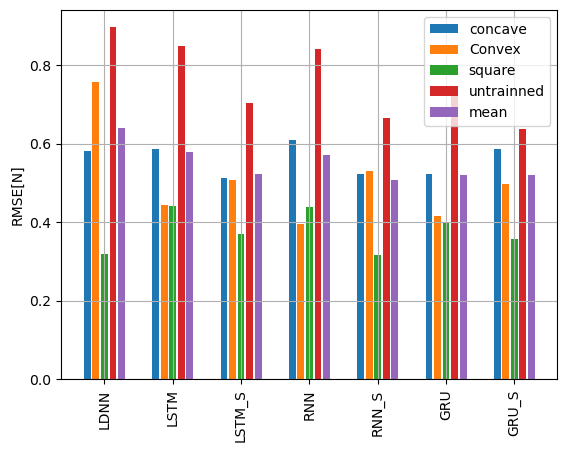

In [109]:
fig, ax = plt.subplots()
x = np.arange(len(df_res.index))
width = 0.1
ax.bar(x - 5*width/2, df_res['concave'], width, label='concave')
ax.bar(x - 2.5*width/2, df_res['Convex'], width, label='Convex')
ax.bar(x            , df_res['square'], width, label='square')
ax.bar(x + 2.5*width/2, df_res['untrainned'], width, label='untrainned')
ax.bar(x + 5*width/2, df_res['mean'], width, label='mean')
ax.set_ylabel('RMSE[N]')
ax.set_xticks(x) 
ax.set_xticklabels(df_res.index.values, rotation='vertical')
ax.legend()
plt.grid()

In [90]:
df_ress

,concave,Convex,square,untrainned,mean
LDNN,0.581037,0.757575,0.319992,0.895406,0.638502
LSTM_S,0.511597,0.508365,0.370648,0.704101,0.523678
RNN,0.607870,0.395713,0.439041,0.841269,0.570973
GRU_S,0.586230,0.497260,0.356049,0.635742,0.518820


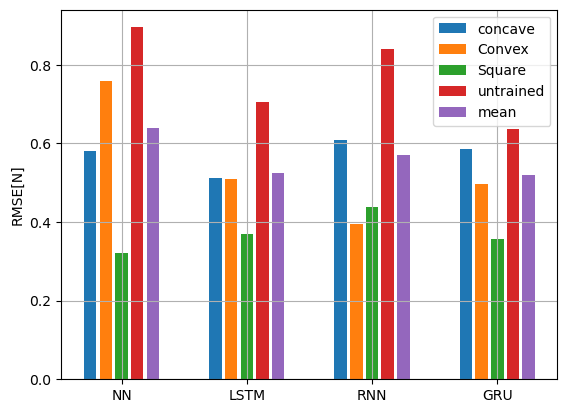

In [114]:
df_ress=df_res.drop(['LSTM', 'RNN_S','GRU'])
fig, ax = plt.subplots()
x = np.arange(len(df_ress.index))
width = 0.1
ax.bar(x - 5*width/2, df_ress['concave'], width, label='concave')
ax.bar(x - 2.5*width/2, df_ress['Convex'], width, label='Convex')
ax.bar(x            , df_ress['square'], width, label='Square')
ax.bar(x + 2.5*width/2, df_ress['untrainned'], width, label='untrained')
ax.bar(x + 5*width/2, df_ress['mean'], width, label='mean')
ax.set_ylabel('RMSE[N]')
ax.set_xticks(x) 
ax.set_xticklabels(['NN','LSTM','RNN','GRU'], rotation='horizontal')
ax.legend()
plt.grid()